# ORIE 4580/5580/5581 Assignment 4

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
import numpy as np
import scipy.stats 
import scipy.linalg as scl
import matplotlib.pyplot as plt
import pandas as pd

___
___

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


In [40]:
buses = np.arange(10,1001,10)
arrivals = np.array(sorted(np.random.uniform(0,1000,10000)))
waits = np.zeros(10000)

j = 0
cur_bus = buses[j]
for i in range(10000):
    if(cur_bus < arrivals[i]):
        cur_bus = buses[j+1];j = j + 1
        waits[i] = cur_bus - arrivals[i]
    else:
        waits[i] = cur_bus - arrivals[i]
        
mean = np.mean(waits)
LB = mean - 1.96*np.std(waits,ddof=1)/np.sqrt(10000)
UB = mean + 1.96*np.std(waits,ddof=1)/np.sqrt(10000)

print("Average waiting time:", np.mean(waits))
print("95% CI = (", LB, ",", UB, ")") 

Average waiting time: 5.042252621924144
95% CI = ( 4.9853051366016325 , 5.099200107246655 )


## Ans.

___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [58]:
#generating bus arrival time
trains = []
T = 0

while(T < 1000):
    T = T + np.random.exponential(10)
    trains.append(T)
trains = np.array(trains)

waits = np.zeros(10000)

j = 0
cur_train = trains[j]
for i in range(10000):
    if(cur_train < arrivals[i]):
        cur_train = trains[j+1];j = j + 1
        waits[i] = cur_train - arrivals[i]
    else:
        waits[i] = cur_train - arrivals[i]
        
mean = np.mean(waits)
LB = mean - 1.96*np.std(waits,ddof=1)/np.sqrt(10000)
UB = mean + 1.96*np.std(waits,ddof=1)/np.sqrt(10000)

print("Average waiting time:", np.mean(waits))
print("95% CI = (", LB, ",", UB, ")") 

Average waiting time: 10.809873154849228
95% CI = ( 10.59169051369631 , 11.028055796002146 )


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [59]:
inter_time = np.diff(trains)
mean = np.mean(inter_time)
LB = mean - 1.96*np.std(inter_time,ddof=1)/np.sqrt(len(inter_time))
UB = mean + 1.96*np.std(inter_time,ddof=1)/np.sqrt(len(inter_time))

print("Average inter-arrival time:", np.mean(inter_time))
print("95% CI = (", LB, ",", UB, ")") 

Average inter-arrival time: 10.528998247924802
95% CI = ( 8.318419403827866 , 12.739577092021738 )


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

Assume that a person is waiting for the train and will be joining train $n$. The expected time that the person will wait is 10 minutes due to the memmoryless property of the Exponential distribution. In addition, looking backwards to the previous train, the time difference is also Exponential, which again has a mean of 10 minutes. Then, the total difference between the two consecutive train is 20 minutes. Note that the company dispatching the train is NOT wrong as the inter-arrival time is 10 minutes from (c). However, 20 minutes is the time the passengers feel.

In [60]:
lead_idx = 0
inter_times = np.zeros(10000)

for i in range(10000):
    while trains[lead_idx] < arrivals[i]: #figure out the bus that this passenger is on
        lead_idx += 1
    if lead_idx > 0:
        inter_times[i] = trains[lead_idx] - trains[lead_idx-1]
    else:
        inter_times[i] = trains[lead_idx]

print("The average time between trains as experienced by passengers is:", np.mean(interbus_times))

The average time between trains as experienced by passengers is: 20.425272388635335


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

___
___

# Question 2: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

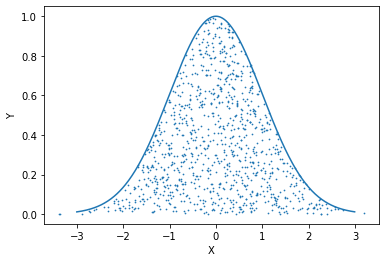

In [98]:
#generate X ~ normal
X = np.random.normal(0,1,1000)
Y = np.array([np.random.uniform(0,np.exp(-X[i]**2/2)) for i in range(1000)])
inputs = np.arange(-3,3,0.01)

plt.scatter(X,Y,s=0.5)
plt.plot(inputs,np.exp(-inputs**2/2))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

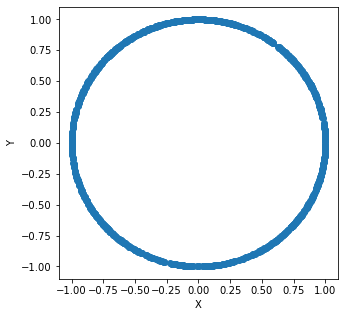

In [89]:
U = np.random.uniform(-1,1,1000)
V = np.random.uniform(-1,1,1000)
norm = np.sqrt(U**2 + V**2)

projected_points = np.array([U/norm, V/norm]).T
thetas = np.array([np.arctan(p[1]/p[0]) for p in projected_points])

plt.figure(figsize=(5,5))
plt.scatter(projected_points[:,0],projected_points[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

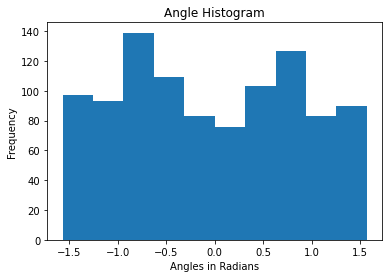

In [91]:
plt.hist(thetas)
plt.xlabel("Angles in Radians")
plt.ylabel("Frequency")
plt.title("Angle Histogram")
plt.show()



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

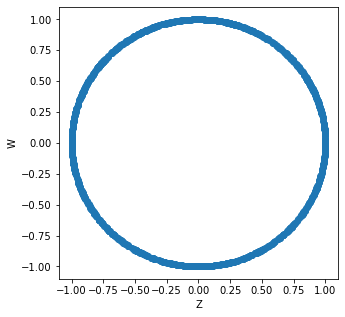

In [92]:
Z = np.random.normal(0,1,1000)
W = np.random.normal(0,1,1000)
norm = np.sqrt(Z**2 + W**2)

projected_points = np.array([Z/norm, W/norm]).T
thetas = np.array([np.arctan(p[1]/p[0]) for p in projected_points])

plt.figure(figsize=(5,5))
plt.scatter(projected_points[:,0],projected_points[:,1])
plt.xlabel("Z")
plt.ylabel("W")
plt.show()

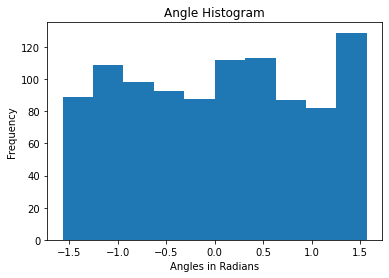

In [93]:
plt.hist(thetas)
plt.xlabel("Angles in Radians")
plt.ylabel("Frequency")
plt.title("Angle Histogram")
plt.show()

In $(b)$, the distribution of the angle is not uniform since it seems to be centered on about at the point $\pi/4, -\pi/4$, but $(c)$ seems to be more uniform. 




---
---


# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.


$$\left(1-\Phi\left(\frac{0-0.14}{0.25}\right)\right)\left(1-\Phi\left(\frac{0-0.07}{0.1}\right)\right)\left(1-\Phi\left(\frac{0-0.16}{0.3}\right)\right)\approx0.380$$

In [29]:
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.matrix([[0.0625, -0.01, 0.0375],[-0.01, 0.01, -0.015],[0.0375, -0.015, 0.09]])

In [30]:
# If independent:
prob_1_pos_return = 1 - scipy.stats.norm.cdf(x=0, loc=mu[0], scale = np.sqrt(Sigma[0,0]))
prob_2_pos_return = 1 - scipy.stats.norm.cdf(x=0, loc=mu[1], scale = np.sqrt(Sigma[1,1]))
prob_3_pos_return = 1 - scipy.stats.norm.cdf(x=0, loc=mu[2], scale = np.sqrt(Sigma[2,2]))

prob_all_pos_return = prob_1_pos_return*prob_2_pos_return*prob_3_pos_return
print("Independent case: probability all positive returns = ", prob_all_pos_return)

Independent case: probability all positive returns =  0.3796164056673423


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



The Cholesky decomposition of the covariance matrix is:

$$\mathbf{L}=
	\begin{bmatrix}
	0.25 & 0 & 0 \\
	-0.04 & 0.0916515 & 0 \\
	0.15 & -0.0981981 & 0.240535
	\end{bmatrix}$$ 
    
20,000 replications yield a 95\% confidence interval of $0.373 \pm 0.007$. 

In [33]:
L = scipy.linalg.cholesky(Sigma, lower=True)
print("Cholesky:  ", L)

n = 20000 # number of replications
all_pos_return = np.zeros(n)

for i in range(n):
    N = np.random.normal(loc=0, scale=1, size=3)
    X = mu + np.dot(L,N)
    
    if sum(X > 0) == 3: # All returns positive; (X>0) is a 0-1 matrix, so all three are positive iff the sum is 3
        all_pos_return[i] = 1

avg = np.mean(all_pos_return)
LB = avg - scipy.stats.norm.ppf(0.975)*np.sqrt(np.var(all_pos_return, ddof=1)/n)
UB = avg + scipy.stats.norm.ppf(0.975)*np.sqrt(np.var(all_pos_return, ddof=1)/n)

print("Correlated case: probability all positive returns =", avg)
print("95% CI:  ", LB, UB)

Cholesky:   [[ 0.25        0.          0.        ]
 [-0.04        0.09165151  0.        ]
 [ 0.15       -0.09819805  0.24053512]]
Correlated case: probability all positive returns = 0.37345
95% CI:   0.3667459375705644 0.3801540624294356


___
___

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.


We have that for $U \sim Unif[\alpha, \beta]$:

\begin{align*}
\mathbb{E}[U] & = \frac{\alpha+\beta}{2} = 0\\
Var[U] & = \frac{(\beta - \alpha)^2}{12} = 1
\end{align*}

And this gives $\alpha = -\sqrt{3}, \beta = \sqrt{3}$

___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.


We have

\begin{align*}
\mathbb{E}[V_2] & = \mathbb{E}[(1-B)X_1 + BX_2] \\
& = \mathbb{E}[(1-B)]\mathbb{E}[X_1] + \mathbb{E}[B]\mathbb{E}[X_2] \\
& = 0
\end{align*}

Notice that by law of total expectation,

\begin{align*}
\mathbb{E}[V^2_2] & = \mathbb{E}[V^2_2|B = 0]P(B = 0) + \mathbb{E}[V^2_2|B = 1]P(B = 1) \\
& = (1-p)\mathbb{E}[X^2_1] + p\mathbb{E}[X^2_2]\\
& = 1
\end{align*}

Then, $Var[V_2] = 1$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.


First, notice that $\sigma_{12} = \rho_{12}\sigma_1\sigma_2 \le 1.$ Since $V_1, V_2$ has zero mean, 

\begin{align*}
Cov(V_1, V_2) & = \mathbb{E}[V_1V_2]\\
& = \mathbb{E}[X^2_1]P(B = 0) + \mathbb{E}[X_1X_2]P(B = 1) \\
& = 1 - p
\end{align*}

Hence, $p = 1 - \sigma_{12}$.

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

In [2]:
def V_generator(sigma = 0):
    U = scipy.stats.bernoulli.rvs(p=1 - sigma)
    X1 = scipy.stats.uniform.rvs(loc = -np.sqrt(3),scale = 2*np.sqrt(3))
    X2 = scipy.stats.uniform.rvs(loc = -np.sqrt(3),scale = 2*np.sqrt(3))
    if U == 1:
        return X1, X2
    else:
        return X1, X1  

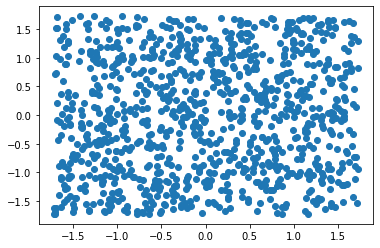

In [3]:
sigma = 0 #change sigma here for other scatter plots
n = 1000
V1 = np.zeros(n)
V2 = np.zeros(n)
for i in range(n):
    V1[i], V2[i] = V_generator(sigma)
plt.scatter(V1,V2)

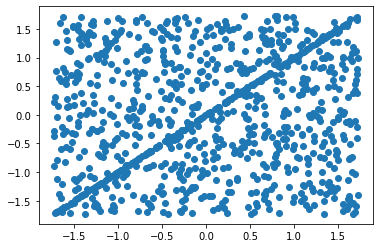

In [35]:
sigma = 0.25 #change sigma here for other scatter plots
n = 1000
V1 = np.zeros(n)
V2 = np.zeros(n)
for i in range(n):
    V1[i], V2[i] = V_generator(sigma)
plt.scatter(V1,V2)

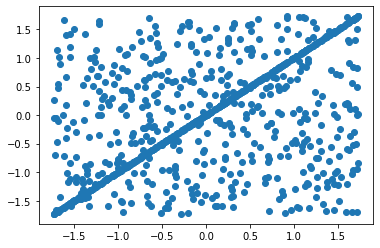

In [3]:
sigma = 0.5 #change sigma here for other scatter plots
n = 1000
V1 = np.zeros(n)
V2 = np.zeros(n)
for i in range(n):
    V1[i], V2[i] = V_generator(sigma)
plt.scatter(V1,V2)

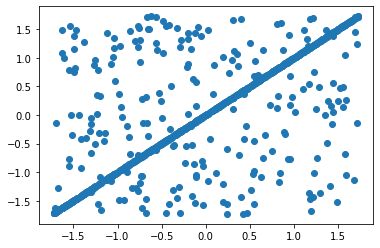

In [4]:
sigma = 0.75 #change sigma here for other scatter plots
n = 1000
V1 = np.zeros(n)
V2 = np.zeros(n)
for i in range(n):
    V1[i], V2[i] = V_generator(sigma)
plt.scatter(V1,V2)

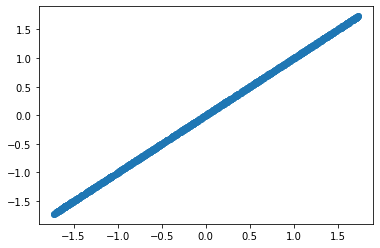

In [5]:
sigma = 1 #change sigma here for other scatter plots
n = 1000
V1 = np.zeros(n)
V2 = np.zeros(n)
for i in range(n):
    V1[i], V2[i] = V_generator(sigma)
plt.scatter(V1,V2)

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [36]:
n = 10000
sigma = 0.5
both_negative = np.zeros(n)
for i in range(n):
    V1, V2 = V_generator(sigma)
    if V1 <=0 and V2 <= 0:
        both_negative[i] = 1
avg = np.mean(both_negative)
LB = avg - scipy.stats.norm.ppf(1-0.05/2) * np.sqrt(np.var(both_negative,ddof=1)/n)
UB = avg + scipy.stats.norm.ppf(1-0.05/2) * np.sqrt(np.var(both_negative,ddof=1)/n)
print("Correlated case: probability both negative =", avg)
print("95% CI:  ", LB, UB)

Correlated case: probability both negative = 0.3833
95% CI:   0.37377036667039926 0.3928296333296007


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & \sigma_{12} \\
		\sigma_{12} & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.


Consider the term $\phi(Z_1)$, we have that 

$$P(\phi(Z_1) \le x) = P(Z_1 \le \phi^{-1}(x)) = \phi(\phi^{-1}(x)) = x$$

Hence, $\phi(Z_1)$ is uniform, which will also make $W_1$ uniform. Finally, $W_2$ ia also uniform.

In [7]:
#L = scl.cholesky(Sigma, lower=True)

def W_generator(sigma, alpha = -np.sqrt(3),beta = np.sqrt(3)):
    Sigma = np.matrix([[1, sigma], [sigma, 1]])
    L = L = scl.cholesky(Sigma, lower=True)
    N = scipy.stats.norm.rvs(loc=0, scale=1, size=2)
    Z = np.dot(L,N)
    return alpha + (beta-alpha) * scipy.stats.norm.cdf(Z[0]), alpha + (beta-alpha) * scipy.stats.norm.cdf(Z[1])

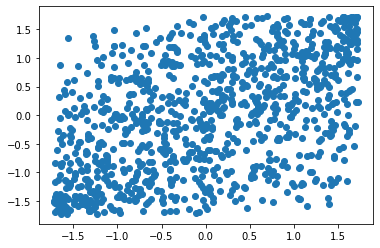

In [38]:
n = 1000
W1 = np.zeros(n)
W2 = np.zeros(n)
for i in range(n):
    W1[i], W2[i] = W_generator(sigma = 0.5)
plt.scatter(W1,W2)

In [39]:
n = 10000
both_positive = np.zeros(n)

for i in range(n):
    W1, W2 = W_generator(sigma = 0.5)
    if W1 >=0 and W2 >= 0:
        both_positive[i] = 1

avg = np.mean(both_positive)
LB = avg - scipy.stats.norm.ppf(1-0.05/2) * np.sqrt(np.var(both_positive,ddof=1)/n)
UB = avg + scipy.stats.norm.ppf(1-0.05/2) * np.sqrt(np.var(both_positive,ddof=1)/n)
print("Correlated case: probability both positive =", avg)
print("95% CI:  ", LB, UB)

Correlated case: probability both positive = 0.3372
95% CI:   0.3279337323644352 0.3464662676355648
